In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv', encoding='latin-1')

In [ ]:
print(f"Initial shape: {df.shape}")

Initial shape: (541909, 8)


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df_clean = df.dropna(subset=['CustomerID']).copy()

In [ ]:
print(f"Shape after removing missing CustomerID: {df_clean.shape}")

Shape after removing missing CustomerID: (406829, 8)


In [ ]:
df_clean = df[df['Quantity'] > 0].copy()

In [ ]:
print(f"Shape after filtering negative Quantity: {df_clean.shape}")

Shape after filtering negative Quantity: (531285, 8)


In [ ]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [ ]:
print(" TotalPrice column added.")

 TotalPrice column added.


In [ ]:
print("\n Converting 'InvoiceDate' to datetime...")
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')
initial_len = len(df_clean)
df_clean = df_clean.dropna(subset=['InvoiceDate']).copy()
dropped = initial_len - len(df_clean)
if dropped > 0:
    print(f"  Dropped {dropped} rows due to invalid dates.")
print(" InvoiceDate converted to datetime.")

print(f"\n Final cleaned dataset shape: {df_clean.shape}")
print("\n Sample of cleaned data:")
print(df_clean.head())

df_clean.to_csv('cleaned_data.csv', index=False)
print("\n Cleaned data saved to 'cleaned_data.csv'")


 Converting 'InvoiceDate' to datetime...
 InvoiceDate converted to datetime.

 Final cleaned dataset shape: (531285, 9)

 Sample of cleaned data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0 

In [ ]:
import pandas as pd

print(" Loading cleaned data...")
df = pd.read_csv('cleaned_data.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

print("🇬🇧 Filtering data for United Kingdom...")
df_uk = df[df['Country'] == 'United Kingdom'].copy()
print(f"UK transactions: {len(df_uk):,}")

print("\n Calculating total quantities sold per product...")
top_products = (
    df_uk
    .groupby(['StockCode', 'Description'])
    .agg(TotalQuantity=('Quantity', 'sum'))
    .reset_index()
    .sort_values('TotalQuantity', ascending=False)
    .head(5)
)

print("\n Top 5 Best-Selling Products in the UK (by Quantity Sold):\n")
print(top_products.to_string(index=False))

top_products.to_csv('top_5_best_selling_uk_products.csv', index=False)
print("\n Results saved to 'top_5_best_selling_uk_products.csv'")

 Loading cleaned data...


/tmp/ipython-input-2185308673.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


🇬🇧 Filtering data for United Kingdom...
UK transactions: 486,286

 Calculating total quantities sold per product...

 Top 5 Best-Selling Products in the UK (by Quantity Sold):

StockCode                        Description  TotalQuantity
    23843        PAPER CRAFT , LITTLE BIRDIE          80995
    23166     MEDIUM CERAMIC TOP STORAGE JAR          77036
    84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS          49526
   85099B            JUMBO BAG RED RETROSPOT          44268
   85123A WHITE HANGING HEART T-LIGHT HOLDER          35452

 Results saved to 'top_5_best_selling_uk_products.csv'


In [ ]:
import pandas as pd
print(" Loading cleaned data...")
df = pd.read_csv('cleaned_data.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print(" Filtering for INTERNATIONAL markets (excluding UK)...")
df_international = df[df['Country'] != 'United Kingdom'].copy()
print(f"International transactions: {len(df_international):,}")

print("\n Calculating total revenue per international country...")
top_markets = (
    df_international
    .groupby('Country')
    .agg(TotalRevenue=('TotalPrice', 'sum'))
    .reset_index()
    .sort_values('TotalRevenue', ascending=False)
    .head(5)
)

print("\n Top 5 International Markets (by Total Revenue):\n")
top_markets['TotalRevenue'] = top_markets['TotalRevenue'].round(2)
print(top_markets.to_string(index=False))

top_markets.to_csv('top_5_international_markets.csv', index=False)
print("\n Results saved to 'top_5_international_markets.csv'")

 Loading cleaned data...


/tmp/ipython-input-3576461794.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


 Filtering for INTERNATIONAL markets (excluding UK)...
International transactions: 44,999

 Calculating total revenue per international country...

 Top 5 International Markets (by Total Revenue):

    Country  TotalRevenue
Netherlands     285446.34
       EIRE     283453.96
    Germany     228867.14
     France     209715.11
  Australia     138521.31

 Results saved to 'top_5_international_markets.csv'


/tmp/ipython-input-3551662313.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


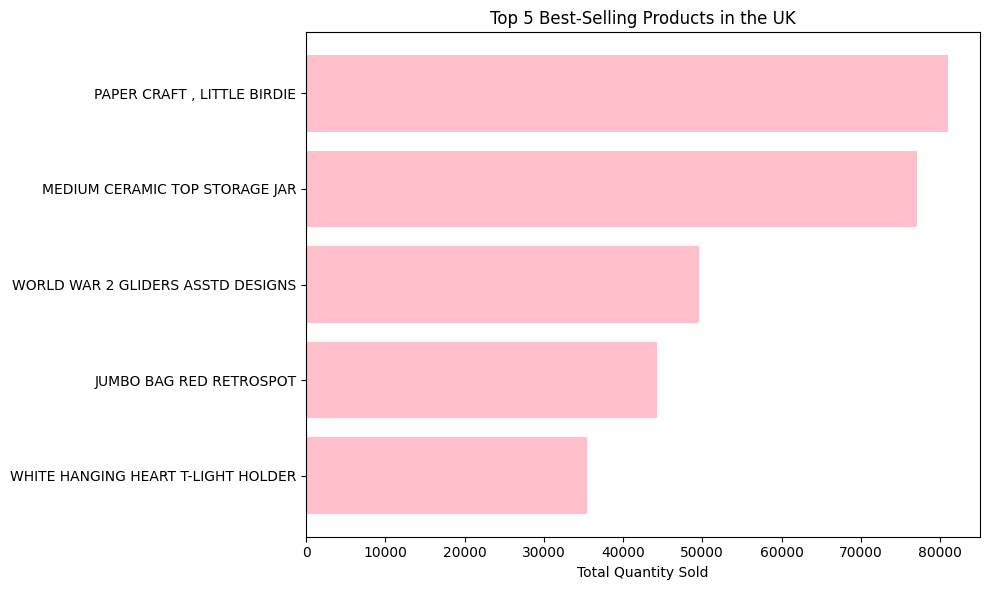

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df_uk = df[df['Country'] == 'United Kingdom'].copy()


top_products = (
    df_uk
    .groupby(['StockCode', 'Description'])
    .agg(TotalQuantity=('Quantity', 'sum'))
    .reset_index()
    .sort_values('TotalQuantity', ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['TotalQuantity'], color='pink')
plt.xlabel('Total Quantity Sold')
plt.title('Top 5 Best-Selling Products in the UK')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2553941164.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


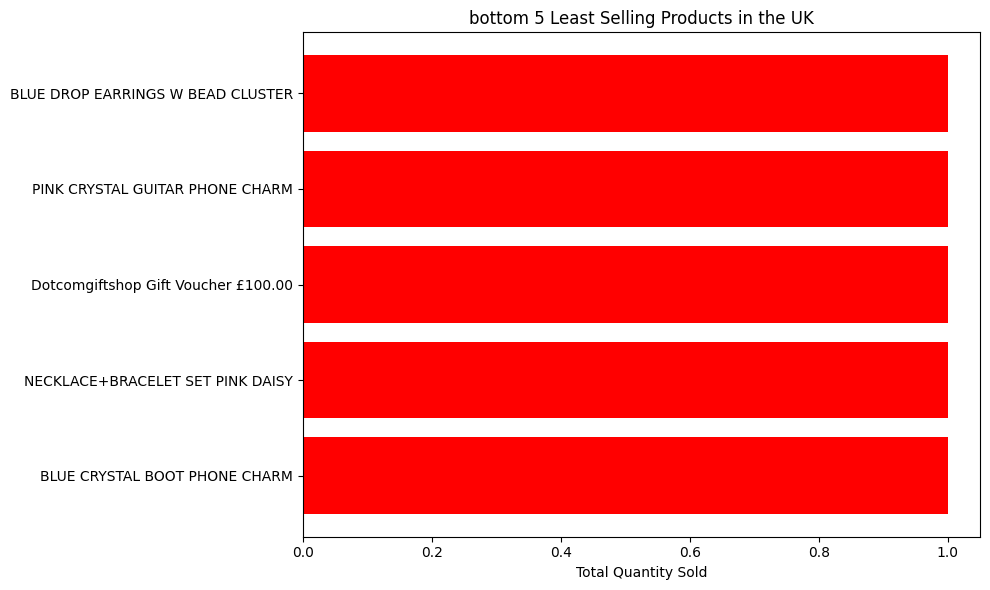

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df_uk = df[df['Country'] == 'United Kingdom'].copy()


bottom_products = (
    df_uk
    .groupby(['StockCode', 'Description'])
    .agg(TotalQuantity=('Quantity', 'sum'))
    .reset_index()
    .sort_values('TotalQuantity', ascending=True)
    .head(5)
)

plt.figure(figsize=(10, 6))
plt.barh(bottom_products['Description'], bottom_products['TotalQuantity'], color='red')
plt.xlabel('Total Quantity Sold')
plt.title('bottom 5 Least Selling Products in the UK')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1365817167.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


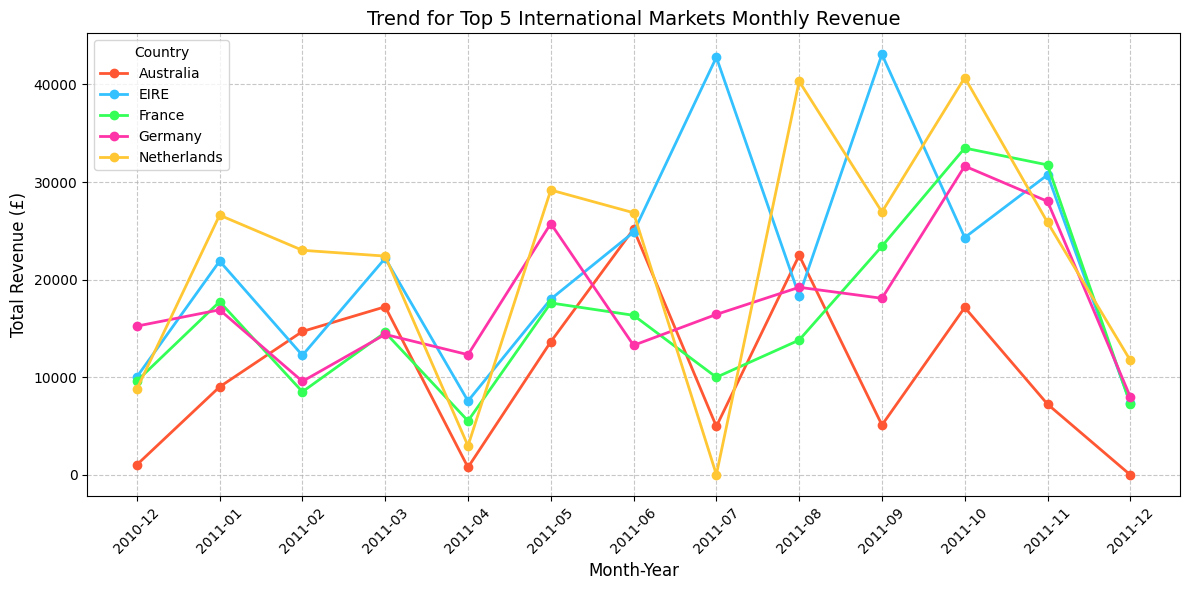

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


df_international = df[df['Country'] != 'United Kingdom'].copy()


top_countries = (
    df_international.groupby('Country')['TotalPrice'].sum().nlargest(5).index
)

df_top = df_international[df_international['Country'].isin(top_countries)].copy()


df_top['YearMonth'] = df_top['InvoiceDate'].dt.to_period('M')
revenue_trend = df_top.groupby(['YearMonth', 'Country'])['TotalPrice'].sum().unstack().fillna(0)


colors = ['#FF5733', '#33C1FF', '#33FF57', '#FF33A8', '#FFC733']


plt.figure(figsize=(12, 6))
for i, country in enumerate(revenue_trend.columns):
    plt.plot(revenue_trend.index.astype(str), revenue_trend[country], label=country, color=colors[i], marker='o', linewidth=2)

plt.title('Trend for Top 5 International Markets Monthly Revenue', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue (£)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2195339836.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


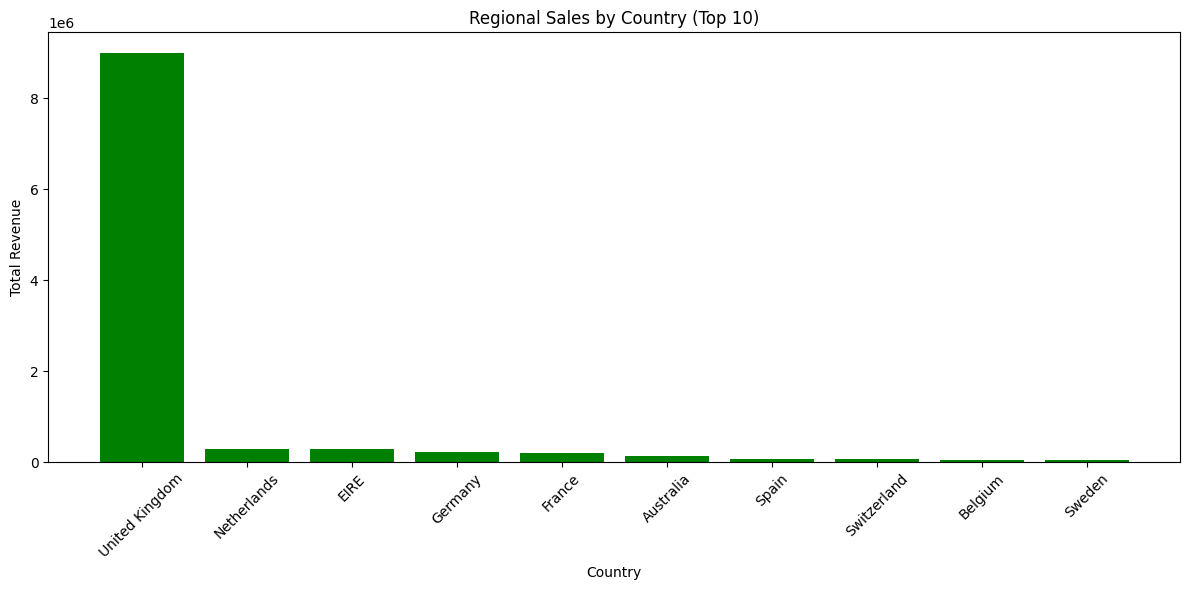

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


df['Revenue'] = df['Quantity'] * df['UnitPrice']
country_sales = (
    df.groupby('Country')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
    .head(10)
)


plt.figure(figsize=(12, 6))
plt.bar(country_sales['Country'], country_sales['Revenue'], color='green')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Regional Sales by Country (Top 10)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1867975885.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


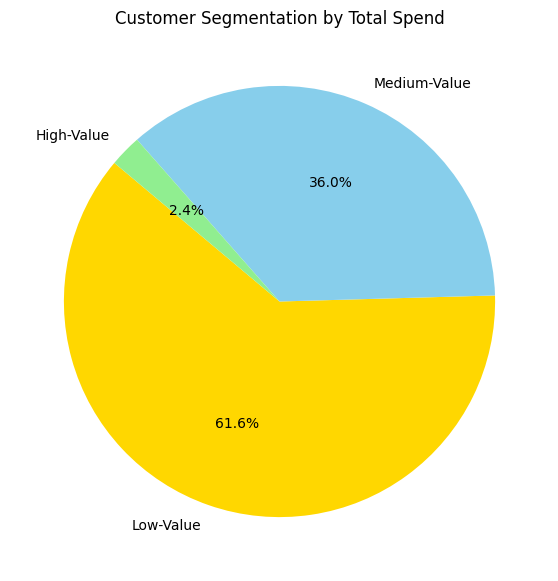

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


df['Revenue'] = df['Quantity'] * df['UnitPrice']
customer_sales = df.groupby('CustomerID')['Revenue'].sum().reset_index()


def segment_customer(x):
    if x >= 10000:
        return 'High-Value'
    elif x >= 1000:
        return 'Medium-Value'
    else:
        return 'Low-Value'

customer_sales['Segment'] = customer_sales['Revenue'].apply(segment_customer)


segment_counts = customer_sales['Segment'].value_counts()


plt.figure(figsize=(7, 7))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold','skyblue','lightgreen'])
plt.title('Customer Segmentation by Total Spend')
plt.show()
